# Introduction to Latent Variable Models and Variational Methods

## CSCI E-82A
### Stephen Elston

## Suggested Reading

The following reading is an optional supplement to the material presented here:
- Barber, Sections 11.1, 11.2, 11.5, 20.1, 20.2, or
- Murphy, Section 11.2.1, 11.3, 11.4.1, 11.4.2, 21.1, 21.2, 21.3, 21.5, 21.6.

## Latent Variable Models

We refer to a probabilistic model with **hidden variables** a **latent variable model**. A latent variable model has three components:  

- **Visible or observed variables, $\nu$:** Data can be acquired for these variables from **emissions** of the values.
- **Hidden, unobserved, or latent variables, $h$:** The actual value of these variables is not observable and can only be estimated. 
- **Model parameters, $\theta$:** Are a vector of parameters which must be estimated for the model. 

In general, our goal is to find the joint distribution:   

$$p(\nu, h; \Theta)$$

## Mixture Models

A mixture model allows us to represent complex probability distributions. There are many real-world cases where a single distribution would not be an accurate representation. For example:

- Missing value problems may require a mixture of distributions. 
- An unscrupulous casino may alternate between using fair and 'loaded' dice. The distribution of numbers shown by these two types of dice are quite different. An observer trying to model the full distribution will need to use a mixture of the two.  
- Returns of many financial assets are dependent on overall market conditions. These returns might represent a specific log-normal distribution for a period of time, and then once investor sentiment changes, a different distribution.   
- Response rates to a promotional email offer might represent distributions for several populations. The offer might be for men's running shoes. One population of respondent is expected to be male athletes. However, the are other potential buyers who might be purchasing the shoes on behalf of a male athlete. There response rates of these populations could be quite different, and from just an email address there is no way to know which population each response comes from. 

Let,  $\mathcal{V} = \{\nu^1, \nu^2, \ldots, \nu^N\}$ be a real-valued vector of observed values in $\mathbb{R}^d$, and $h_i \in \{1, 2, 3, \ldots, K \}$ be a discrete-valued hidden variable. We can represent a factorized DAG of the mixture model as: 

$$p(\nu, h) = p(\nu\ |\ h) p(h)$$

Where, $p(h = k) = \pi_k$, for some probabilities of each of the $K$ components of the mixture. 

### Gaussian Mixture Model

One of the most widely used mixture models is the **mixture of Gaussian distributions**. GMMs are used in many applications from engineering, medicine, and robot navigation. 

As the name implies the GMM is a mixture of *K* individual Gaussian distributions where the probability of the kth distribution is $\pi_k \in \{\pi_1, \pi_2, \ldots, \pi_K \}$. Each of the *K* distributions has a location parameter, $\mu_k \in \{\mu_1, \mu_2, \ldots, \mu_K\}$ and a covariance parameter, $\Sigma_k \in \{\Sigma_1, \Sigma_2, \ldots, \Sigma_K\}$. The parameter vector for one component of the latent variable model is then:  

$$\theta_k = \{ \mu_k, \Sigma_k , \pi_k \} $$

The conditional probability distribution for a single component of the GMM can then be written:   

$$p(\nu\ |\ h = k) = \mathcal{N}(\mu_k, \Sigma_k )$$

What we actually observe is the marginal distribution of the visible variables. For the GMM we can find this marginal distribution as follows:  

$$p(v) = \sum_{k=1}^{K} p(\nu\ |\ h = k) p(h = k) =  \sum_{k=1}^{K} \pi_k \mathcal{N}(\mu_k, \Sigma_k)$$

Here, the hidden variable is marginalized out. The right hand term is the expectation of $p(x)$ for the mixture of Gaussians.

## Review of Kullback-Leibler Divergence

Variational methods are based on the Kullback-Leibler divergence. Let's review some of the properties of the KL divergence.   

The KL divergence between two distributions, $p(x)$ and $q(x)$ is written:

$$\mathbb{D}_{KL}(P \parallel Q) = - \sum_{x} p(x)\ ln_b \frac{p(x)}{q(x)}$$   

Some key properties of the KL divergence include:   

- $\mathbb{D}_{KL}(P \parallel Q) \ge 0$ for all $p(x)$ and $q(x)$.
- $\mathbb{D}_{KL}(P \parallel Q) = 0$ if and only if $p(x)= q(x)$.
- KL divergence is not symmetric so, $\mathbb{D}_{KL}(P \parallel Q) \ne \mathbb{D}_{KL}(Q \parallel P)$. This is why the term **divergence** is applied and this quantity cannot be considered a distance metric. 
- $\mathbb{D}_{KL}(P|Q) = \mathbb{H}(P) + \mathbb{H}(P,Q)$, or KL divergence of $P$ with respect to $Q$ is the entropy of $P$ plus the cross entropy between $P$ and $Q$. 

## Variational EM Algorithm

We will now turn our attention to the **variational EM algorithm**. Our goal is to find a set of parameters, $\theta$, which maximize the marginal likelihood of the observed data values, $p(\nu\ |\ \theta)$. To do so we find the **variational distribution** of $p(\nu\ |\ h)$ which minimizes the KL divergence with respect to $p(\nu\ |\ h, \theta)$. This approach leads to the following **variational bound**:

$$
\mathbb{D}_{KL}(q(h\ |\ \nu) \parallel p(h\ |\ \nu, \theta)) = 
\mathbb{E}_{q(h\ |\ \nu)} \big[ log(q(h\ |\ \nu))  -
 log(p(h\ |\ \nu, \theta)) \big]
\ge 0
$$

We can express the distribution on the far right as:  

$$p(h\ |\ \nu, \theta) = \frac{p(h, \nu\ |\ \theta)}{p(\nu\ |\ \theta)}$$

Using the above two relationships, we can do some substitutions and rearranging of terms to obtain a bound on the marginal likelihood: 

\begin{align}
log\ p(\nu\ |\ \theta) &\ge -\mathbb{E}_{q(h\ |\ \nu)} \big[ log(q(h^n\ |\ \nu^n)) \big] +
\mathbb{E}_{q(h\ |\ \nu)} \big[ log(p(h, \nu\ |\  \theta)) \big] \\
&\ge - Entropy\ term + Energy\ term
\end{align}

These two terms are break the marginal distribution into two terms, entropy and energy. The energy term is also known as the **expected complete data log likelihood**. The energy term is the only one dependent on $\theta$. 

In the foregoing, we have only considered a single observation, $\nu$. Now, we will consider the situation where there are a set of observations, $\mathcal{V} \in \{\nu^1, \nu^2, \ldots, \nu^N\}$. For these multiple observations the above relationship can be written as follows .

$$
p(\mathcal{V}\ |\ \theta) \ge \tilde{\mathcal{L}}(q^*, \theta) \equiv -\sum_{n=1}^N \mathbb{E}_{q(h^n\ |\ \nu^n)} \big[ log(q(h^n\ |\ \nu^n)) \big] +
\sum_{n=1}^N \mathbb{E}_{q(h^n\ |\ \nu^n)} \big[ log(p(h^n, \nu^n\ |\  \theta)) \big] 
$$

Where $\tilde{\mathcal{L}}(q^*, \theta)$ is the likelihood of the variational distribution $q^*$ given $\theta$. The bound on this likelihood is exact when $q(h^n\ |\ \nu^n) = p(h^n, \nu^n\ |\  \theta)$, for $n \in \{1, 2, \ldots, N\}$.  



### Optimization with EM Algorithm

We need to optimize (minimize) this bound with respect to both $\theta$ and $q^*$. This is done using the **EM algorithm**. The log-likelihoods are increased at each step until convergence. The steps in this algorithms are:  

**E-Step:**    

For the E-step $\theta$ is fixed and we vary, $q(h^n\ |\ \nu^n)$ to maximize the likelihood, $\tilde{\mathcal{L}}(q^*, \theta)$. We would like to maximize the likelihood for $h$. But, by definition, we cannot know the actual values of the hidden variables. However, we can compute an updated estimate, $q^{new}(h^n\ |\ \nu^n, \theta)$, using observed data, $p(\nu)$ and current estimates of $q^{old}(\theta)$.   

This process is often referred to as **hallucinating data**, since data for hidden variables are manufactured. This process is also known as the **E-step**, since it maximizes the expected value of $log(p(h, \nu; \theta))$. This can be accomplished by finding $q^{new}(h)$ that minimizes KL divergence:     

**M-Step:**    

Likewise, using the values of observed data, $\nu$ and the fixed current estimates of $q^{old}(h^n\ |\ \nu^n)$ we can compute an updated estimate of the parameters $\theta$. This process is also known as the **M-Step**, since it maximizes the likelihood of $\tilde{\mathcal{L}}(q^*, \theta)$. This step involves finding $\theta$ that maximizes the energy term:

$$
\sum_{n=1}^N \mathbb{E}_{q(h^n\ |\ \nu^n)} \big[ log(p(h^n, \nu^n\ |\  \theta)) \big]
$$  

The entropy term does not depend on $\theta$.

## Density Estimation for Mixtures

For N visible data values, $\mathcal{V} = \{\nu^1, \nu^2, \ldots, \nu^N\}$, we can express the probability of each observation, $p(\nu_i)$, given the value of the hidden variable, $i$, is: 

$$p(\nu^1, \nu^2, \ldots, \nu^N) = \prod_{i=1}^K p(\nu^n\ |\ i) \pi_i$$

Here, $p(i) = \pi(i)$ is the probability that the observed value $\nu_i$ was generated by the ith distribution, $p(\nu^n\ |\ i)$.  

## The Gaussian Mixture Model

One of the most widely used mixture of distributions models in the Gaussian Mixture Model (GMM). This mixture is comprised of $N$, $D$ dimensional Gaussian distribution components. The ith component has two parameters:    

- $\mu_i$, the vector of means.   
- $\Sigma_i$, the covariance matrix.   

This leads to the Gaussian distribution:   

$$p(\nu\ |\ \mu_i, \Sigma_i) = \frac{1}{\sqrt{det(2 \pi \Sigma_i)}}  exp \Big[ -\frac{1}{2}(\nu - \mu_i)\Sigma_i^{-1}(\nu - \mu_i) \Big]$$

The probability distribution of the GMM is then given by:  

$$p(\nu) = \sum_{i=1}^H p(\nu\ |\ \mu_i, \Sigma_i) \pi_i$$  

We can write the parameters $\theta = \{\mu_i, \Sigma_i, \pi_i, i = 1, \ldots, H \}$, and the i.i.d. **observed dataset** $\mathcal{V} \in \{\nu^1, \nu^2, \ldots, \nu^N\}$ the log-likelihood is:  

$$p(\mathcal{V}\ |\ \theta) = \sum_{n=1}^N log \sum_{i=1}^H  \frac{\pi_i}{\sqrt{det(2 \pi \Sigma_i)}}  exp \Big[ -\frac{1}{2}(\nu - \mu_i)\Sigma_i^{-1}(\nu - \mu_i) \Big]$$

The probabilities of the components, $\pi_i$, have the constraints:

$$
0.0 \ge \pi_i \ge 1.0 \\
\sum_{i=1}^H \pi_i = 0.0
$$

### EM for GMMs   

We can perform the optimization to find the parameters, $\theta$, by maximizing the log likelihood $log(p(\nu\ |\ \theta_*))$. This optimization is performed using the EM algorithm. For the observed data values, $\mathcal{V} \in \{\nu^1, \nu^2, \ldots, \nu^N\}$, the two steps of the EM algorithm are:  

- In the M-step updates for the 3 components of the model parameters, $\theta = \{ \mu_i, \Sigma_i, \pi_i, i = 1, \ldots, H \}$, are computed, for each component of the mixture, indexed by the latent variable, $i$.
- In the E-step updates for the distribution of the latent variable, $p(i|\mathcal{V})$ are computed, while holding the parameters , $\theta$, constant. 

Notice that the above procedure finds a mixture with **probabilistic component contributions**. Rather than assuming each observed data value comes from one unique component of the mixture, the contribution of each component is given by a conditional probability, $p(i|\mathcal{V})$. The next effect is sometimes referred to as a **soft mixture**.   


**M-Step:**

Using the index i as the latent variable the energy component is:   

$$
\sum_{n=1}^N \mathbb{E}_{q(i|\nu^n)} \big[ log(p(\nu^n,i)) \big] = 
\sum_{n=1}^N \mathbb{E}_{q(i|\nu^n)} \big[ log(p(\nu^n | i)) log(i)\big]
$$

Using the Gaussian formulation the above relation becomes:   

$$
\sum_{n=1}^N \sum_{i=1}^H  p^{old}(i | \nu^n) \sum_{n=1}^N
\Big[ -\frac{1}{2}(\nu^n - \mu_i)\Sigma_i^{-1}(\nu^n-\mu_i)  -\frac{1}{2} log(det(2 \pi \Sigma_i)) + log p(i)\Big]
$$

As already noted, the there are three components to the parameter set, $\theta$, $\mu_i$, $\Sigma_i$ and the mixture component, $i$. Each of this is found independently. 

**M-Step for $\mu_i$:**

$$
\sum_{n=1}^N \sum_{i=1}^H  p^{old}(i | \nu^n)\ (\nu^n - \mu_i)\Sigma_i^{-1}(\nu^n - \mu_i) 
$$

$$p^{old}(n|i) = \frac{p^{old}(i|\nu^n)}{\sum_{n=1}^N p^{old}(i|\nu^n)}$$

$$\mu_i^{new} = \sum_{n=1}^N p^{old}(n|i) \nu^n$$

**M-Step for $\Sigma_i$:**   

$$
\sum_{n=1}^N \mathbb{E}_{p^{old}(i | \nu^n))}
\Big[ (\nu^n - \mu_i)\Sigma_i^{-1}(\nu^n-\mu_i)  - log(det(2 \pi \Sigma_i)) \Big]
$$

$$m_i^{new} = \sum_{n=1}^N p^{old}(n|i) (\nu^n - \mu_i) \cdot (\nu^n - \mu_i)$$

**M-Step for mixture coefficient $i$:**    

$$p^{new}(i) =  \frac{1}{N} \sum_{n=1}^N p^{old}(i|\nu^n)$$


**E-Step:**

\begin{align}
p(i | \nu^n) &= \frac{p(\nu^n | i)\ p(i)}{p(\nu^n)} \\
&= \frac{p(i)\ exp \Big[- \frac{1}{2}(\nu^n - \mu_i)\Sigma_i^{-1}(\nu^n - \mu_i) \Big] \ det(\Sigma_i)^{-\frac{1}{2}}}
{\sum_{i'} p(i')\ exp \Big[ \frac{1}{2}(\nu^n - \mu_{i'})\Sigma_i^{-1}(\nu^n - \mu_{i'}) \Big]\ 
det(\Sigma_{i'})^{-\frac{1}{2}}}
\end{align}

## Variational Bayes 

We need a way to perform inference to find the parameter vector, $\theta$, and latent varaible values, $h$, of the latent variable model, $p(\nu, h; \Theta)$. As has already been stated, there are no exact inference methods for latent variable problems. However, there are practical approximate methods, which often work well.     

The Monte Carlo method has been applied to latent variable problems for decades. More recently **variational methods** have been gaining popularity. There are several key differences between Monte Carlo methods and variational methods:    

- Variational methods are **computationally more efficient** than Monte Carlo methods. This fact, has lead to the growth in the use of variational methods.
- We can always know when a variational approximation method has converged. This is not the case with Monte Carlo methods. 
- Variational methods use **local optimization** and there is no guarantee the **global optimum** can ever be found. Whereas, Monte Carlo methods will generally find the globally optimal solution, eventually. This local convergence property is the price we pay for the efficiency of variational methods.  

### The Variational Lower Bound

Our problem is the find the full vector of parameters, $\theta$, using just the data from the visible variables, $\nu$. The problem of finding the posterior distribution of $\theta$ given $\nu$ can be formulated as:   

$$p(\theta\ |\ \nu) \propto p(\nu\ |\ \theta) p(\theta) \propto \sum_h p(\nu, h\ |\ \theta) p(\theta)$$  

Where, $p(\theta)$ is the prior distribution of $\theta$. Since our goal is to find the value of $\theta$ that maximizes the likelihood, $p(\theta\ |\ \nu)$, we can work with proportional relationships and therefore not have to deal with the troublesome normalization $Z(\theta)$.

The variational approximation assumes that the joint conditional distribution can be factorized as follows:  

$$p(\nu, h\ |\ \theta) \approx q(h) q(\theta)$$

The variational approximation is achieved by finding a value of $\theta$ that minimizes the KL divergence between $p(h, \theta\ |\ \nu)$ and $q(h) q(\theta)$. Using these terms, the expanded KL divergence, and the properties stated in the previous section we find:  

$$\mathbb{D}_{KL}(q(h) q(\theta) \parallel p(h, \theta\ |\ \nu)) = 
\mathbb{E}_{q(h)} \big[ log(q(h)) \big] + 
\mathbb{E}_{q(\theta)} \big[ log(q(\theta)) \big] -
\mathbb{E}_{q(h) q(\theta)} \big[ log(p(h, \nu\ |\ \theta)) \big]
\ge 0$$

Rearranging these terms we find the bound on $log(p(\nu))$:

$$log(p(\nu)) \ge 
-\mathbb{E}_{q(h)} \big[ log(q(h)) \big] -
\mathbb{E}_{q(\theta)} \big[ log(q(\theta)) \big] +
\mathbb{E}_{q(h) q(\theta)} \big[ log(p(h, \nu, \theta)) \big]$$  


From the above, you can see that we can maximize the likelihood of the joint distribution by minimizing the KL divergence of $(p(h, \nu, \theta)$ with respect to $q(h)$ and $q(\theta)$. Given the aforementioned factorization, this minimization can be achieved coordinate-wise, making the problem tractable. In fact, if we employ an algorithm that maximizes likelihood, it is clear from the above relationship that the bound will be reduced and the algorithm will converge. 

### The Variational EM Algorithm

There are two alternating steps in the variational algorithm. The first step improves the estimate of the values of the hidden variables, $h$. The second step improves the estimate of the model parameters, $\theta$. At each iteration the variational lower bound is reduced. The iterations continue until the algorithm converges.    

**The E-step:**   

We would like to maximize the likelihood for $h$. But, by definition, we cannot know the actual values of the hidden variables. However, we can compute an updated estimate, $q^{new}(h)$, using observed data, $p(\nu)$ and current estimates of $q(\theta)$ and $q^{old}(h)$.   

This process is often referred to as **hallucinating data**, since data for hidden variables is manufactured. This process is also known as the **E-step**, since it maximizes the expected value of $log(p(h, \nu; \theta))$. This can be accomplished by finding $q^{new}(h)$ that minimizes KL divergence:  

$$q^{new}(h) = \underset{q(h)}{argmin}\ \mathbb{D}_{KL}(q(h) q^{old}(\theta) \parallel p(h, \theta\ |\ \nu))$$


**The M-step:**   

Likewise, using the values of observed data, $\nu$ and current estimates of $q^{old}(\theta)$ and $q(h)$ we can compute an updated estimate of $q^{new}(\theta)$. This process is also known as the **M-Step**, since it maximizes the likelihood of $q(\theta)$. This step involves finding a $q^{new}(\theta)$ that minimizes KL divergence:

$$q^{new}(\theta) = \underset{q(\theta)}{argmin}\ \mathbb{D}_{KL}(q^{new}(h) q(\theta) \parallel p(h, \theta\ |\ \nu))$$

### Unconstrained Variational Solution

If we rearrange the terms in the above equation for the KL divergence for $q(h)$ and hold $q(\theta)$ constant and introduce the distribution $\tilde{p}(h)$, which is the marginal distribution of $h$ at a fixed $\theta$. This results in the following equation:  

$$
\mathbb{E}_{q(h)} \big[ log(q(h)) \big] -
\mathbb{E}_{q(h) q(\theta)} \big[ log(p(h, \nu, \theta)) \big] =
\mathbb{D}_{KL}(q(h)  \parallel \tilde{p}(h)) + Constant
$$

Where,   

$$\tilde{p}(h) = 
 \frac{1}{\tilde{Z}} exp \Big( \mathbb{E}_{q(\theta)} \big[ log(p(h, \nu, \theta)) \big] \Big)
$$   

Here, $\tilde{Z}$ is the normalization constant. 

The E-step and M-step are then:

**E-Step**  

In the E-step we hold $q(\theta)$ constant and vary $p(h)$ so that it equals $\tilde{p}(h)$, resulting in the following update relationship:

$$q(h) \propto  exp \Big( \mathbb{E}_{q(\theta)} \big[ log(p(h, \nu, \theta)) \big] \Big) 
\propto exp \Big( \mathbb{E}_{q(\theta)} \big[ log(p(h, \nu\ |\ \theta)) \big] \Big)$$

**M-Step**

Similarly for the M-step we hold $q(h)$ constant and vary $\theta$, resulting in the following update relationship:

$$q(\theta) \propto  exp \Big( \mathbb{E}_{q(h)} \big[ log(p(h, \nu, \theta)) \big] \Big)  
\propto p(\theta) exp \Big( \mathbb{E}_{q(h)} \big[ log(p(h, \nu\ |\ \theta)) \big] \Big)$$

### EM as Special Case of Variational Bayes

The classical **expectation maximization** or **EM algorithm** is a **maximum likelihood** method for estimating parameters of latent variable model models. In contrast to variational Bayes, classical EM algorithms do not require the specification of a prior for $p(\theta)$, as one would expect from a maximum likelihood method.   

There is a close relationship between variational Bayes and classical EM algorithms. In fact, the classical EM algorithm is a special case of the variational Bayes algorithm with two conditions:

1. The result is the maximum likelihood value of the parameters, denoted as $\theta_*$.
2. A uniform or flat prior is assumed for $p(\theta)$.  

If we apply these two conditions to the variational bound we arrive at:   

$$log(p(\nu\ |\ \theta_*)) \ge 
-\mathbb{E}_{q(h)} \big[ log(q(h)) \big] -
\mathbb{E}_{q(h)} \big[ log(p(h, \nu, \theta_*)) \big] + Constant
$$  

Further, with the observation that the above is the clasical EM algorth with the addition of a constant. The non-constant terms correspond to the entropy and energy terms of classical EM.


## Computational Examples

Let's try some computational examples. 

As a first step, execute the code in the cell below to load the required packages.

In [75]:
import numpy as np
import numpy.random as nr
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Execute the code in the cell below to create a uniform grid of x and y values which will be used for plotting distributions.

In [76]:
steps = 40
x_values = np.arange(-2.0, 2.0, 0.1)
y_values = np.arange(-2.0, 2.0, 0.1)
x = np.empty((steps*steps,2))
for i,xv in enumerate(x_values):
    for j,yv in enumerate(y_values):
        x[steps*i+j:] = np.array([xv,yv])

### Gaussian Mixture Example

The code in the cell below computes and plots the contours of a single bi-variate Gaussian (Normal) distribution. This distribution has the following properties: 
- The mean of vector is 0.0 for both x and y. 
- The diagonal values of the covariance matrix are both 1.0. The diagonal terms specify the variances of the marginal distributions of the variable. The off-diagonal terms specify the relationship between the variables. In this case the off-diagonal terms are close to 1.0, meaning there is a high dependency between the variables. If these terms were set to 0.0, there would be no dependency. 

Execute this code and examine the result.

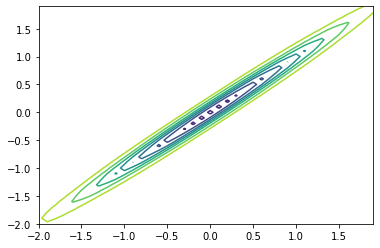

In [77]:
mean = np.array([0.0,0.0])
cov = np.array([[1.0, 0.99], [0.99, 1.0]])
gaussian_pdf = -multivariate_normal.pdf(x, mean=mean, cov = cov).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf)

Examine the contour plots of this bi-variate distribution. Notice that there is a high dependency between the two variables, whereas the variance is the same on both dimensions. 

Now we will explore a mixture of Gaussian distributions. The code in the cell below computes three Gaussian distributions with weights of these components are, 0.35, 0.25, and 0.4. The means and covariances are different for each of these components as you can see from the code below. 

Execute this code and the cell below to compute these distributions on the grid and plot the contours for each. 

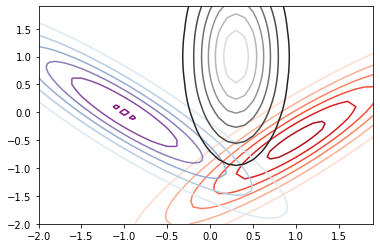

In [78]:
mixture_coefficient = [0.35,0.25,0.4]
mean1 = np.array([-0.5,1.0])
cov1 = np.array([[1.0, 0.9], [.9, 1.0]])
gaussian_pdf1 = mixture_coefficient[0] * multivariate_normal.pdf(x, mean=mean1, cov = cov1).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf1, cmap=plt.get_cmap('Reds'))

mean2 = np.array([0.0,-1.0])
cov2 = np.array([[1.0, -0.9], [-0.9, 1.0]])
gaussian_pdf2 = mixture_coefficient[1] * multivariate_normal.pdf(x, mean=mean2, cov = cov2).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf2, cmap=plt.get_cmap('BuPu'))

mean3 = np.array([1.0,0.3])
cov3 = np.array([[1.0, 0.0], [0.0,0.1]])
gaussian_pdf3 = mixture_coefficient[2] * multivariate_normal.pdf(x, mean=mean3, cov = cov3).reshape((steps,steps))
plt.contour(x_values, y_values, gaussian_pdf3, cmap=plt.get_cmap('gray'))

You can see the means and covariances of each of these components are different. 

The code in the cell below sums the three weighted Gaussian components and creates a contour plot of the resulting mixture distribution. 

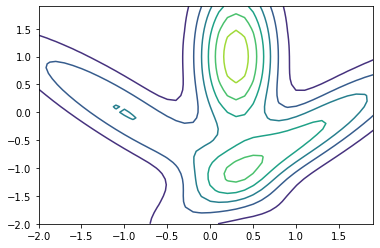

In [79]:
gaussian_pdf = np.add(np.add(gaussian_pdf1,gaussian_pdf2),gaussian_pdf3)
plt.contour(x_values, y_values, gaussian_pdf)

The contour plot shows the density of the Gaussian mixture with 3 components.  

## Gaussian Mixture Model

Now we will compute a GMM using the MLE variational EM algorithm. 

As a first step we will compute samples from a Gaussian mixture. The weights, means and covariances are the same as before. 

Execute the code and examine the plot of the samples. 

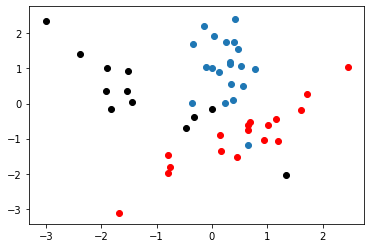

In [80]:
nsamples = 50
samples1 = multivariate_normal.rvs(mean=mean1, cov=cov1, size = int(mixture_coefficient[0] * nsamples))
plt.scatter(samples1[:,1], samples1[:,0], color = 'r')
samples2 = multivariate_normal.rvs(mean=mean2, cov=cov2, size = int(mixture_coefficient[1] * nsamples))
plt.scatter(samples2[:,1], samples2[:,0], color = 'black')
samples3 = multivariate_normal.rvs(mean=mean3, cov=cov3, size = int(mixture_coefficient[2] * nsamples))
plt.scatter(samples3[:,1], samples3[:,0])

The code in the cell below concatenates the samples from the 3 Gaussian distributions to create a mixture. Then the Gaussian mixture model is defined and then fit. Execute this code.  

In [81]:
samples = np.concatenate((samples1,samples2,samples3))
GM_model = GaussianMixture(n_components = 3, verbose = 2)
GM_model.fit(samples)

Initialization 0
Initialization converged: True	 time lapse 0.01197s	 ll -2.91846


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=2,
                verbose_interval=10, warm_start=False, weights_init=None)

Execute the code in the cell below to print the estimated weights for the mixture components and examine the results. 

In [82]:
GM_model.weights_

array([0.39045304, 0.24617301, 0.36337395])

Execute the code in the cell below to print the estimated means for the mixture components and examine the results.

In [83]:
GM_model.means_

array([[-0.66073175,  0.50823513],
       [-0.17227807, -1.61542176],
       [ 1.25120443,  0.47950687]])

Execute the code in the cell below to print the estimated covariances for the mixture components and examine the results.

In [84]:
GM_model.covariances_

array([[[ 0.39379668, -0.11448565],
        [-0.11448565,  0.31024938]],

       [[ 2.36220861, -0.72479446],
        [-0.72479446,  0.41181995]],

       [[ 0.39458902, -0.19181879],
        [-0.19181879,  0.45610181]]])

Compare these estimated parameters for each component of the mixture to the parameters used to compute the sample data. How close are the parameters estimated with the variational model to the ones used to generate the data.  

### Bayesian Gaussian Mixture Model

Now you will compute Gaussian Bayes GMM using the Bayesian variational EM algorithm and compare the results to the ones computed with the MLE model. 

The code in the cell below defines and fits the Gaussian GMM. In this case a weight concentration prior is specified. The value close to 1, the maximizes the weight of the central (main) components. Execute this code.

In [85]:
GM_model_Bayes = BayesianGaussianMixture(n_components = 3, 
                                         weight_concentration_prior = 0.9,
                                        verbose = 2)
GM_model_Bayes.fit(samples)

Initialization 0
  Iteration 10	 time lapse 0.02397s	 ll change 0.01528
  Iteration 20	 time lapse 0.03886s	 ll change 0.01947
  Iteration 30	 time lapse 0.01596s	 ll change 0.00816
Initialization converged: True	 time lapse 0.09678s	 ll -76.75714


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=3, n_init=1,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=2, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=0.9,
                        weight_concentration_prior_type='dirichlet_process')

Execute the code in the cell below to print the estimated weights for the mixture components and examine the results. 

In [86]:
GM_model_Bayes.weights_

array([0.40449097, 0.29313467, 0.30237437])

Execute the code in the cell below to print the estimated means for the mixture components and examine the results.

In [87]:
GM_model_Bayes.means_

array([[ 1.01717407,  0.24481834],
       [ 0.08621038, -0.88121802],
       [-0.83746502,  0.42806704]])

Execute the code in the cell below to print the estimated covariances for the mixture components and examine the results.

In [88]:
GM_model_Bayes.covariances_

array([[[ 0.72857187, -0.05662595],
        [-0.05662595,  0.14886847]],

       [[ 1.14681195, -1.06327379],
        [-1.06327379,  1.52494088]],

       [[ 1.01761117,  0.7553762 ],
        [ 0.7553762 ,  1.10487625]]])

Compare these estimated parameters for each component of the mixture model to the parameters used to compute the sample data. How close are the parameters estimated with the variational model to the ones used to generate the data. Are these estimates closer or further from the actual values when compared to the MLE model. 

### Estimation with More Data

The parameters estimated by the foregoing models are not particularly close to the known values. Repeat the above analysis using 500 samples, rather than 50. Then compare the results. How much do the estimates change for each model when more data is available. 